In [1]:
import pandas as pd

### We have 3 parquet files which contain power_usage of each meter at particular time, location details of that meter and weather condition in particular location at specific time

In [2]:
demand = pd.read_parquet("/kaggle/input/electricity-consumption/demand.parquet")
weather = pd.read_parquet("/kaggle/input/electricity-consumption/weather.parquet")
metadata = pd.read_parquet("/kaggle/input/electricity-consumption/metadata.parquet")

In [3]:
demand.head(5)

,unique_id,timestamp,y
0,a4077c2f0ac5f939,2012-10-12 00:30:00,0.0
1,a4077c2f0ac5f939,2012-10-12 01:00:00,0.0
2,a4077c2f0ac5f939,2012-10-12 01:30:00,0.0
3,a4077c2f0ac5f939,2012-10-12 02:00:00,0.0
4,a4077c2f0ac5f939,2012-10-12 02:30:00,0.0


In [4]:
weather.head(5)

,timestamp,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,soil_moisture_7_to_28cm,is_day,sunshine_duration,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,global_tilted_irradiance,terrestrial_radiation,location_id
0,2011-01-01 00:00:00,4.185,97.231140,3.785,1.554386,0.0,0.0,0.0,0.0,3.0,...,0.393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gcpvhftyz86u
1,2011-01-01 01:00:00,4.235,95.873947,3.635,1.415810,0.0,0.0,0.0,0.0,3.0,...,0.393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gcpvhftyz86u
2,2011-01-01 02:00:00,3.985,94.856133,3.235,1.027121,0.0,0.0,0.0,0.0,3.0,...,0.393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gcpvhftyz86u
3,2011-01-01 03:00:00,3.735,94.176834,2.885,0.703634,0.0,0.0,0.0,0.0,3.0,...,0.393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gcpvhftyz86u
4,2011-01-01 04:00:00,3.435,93.829292,2.535,0.249520,0.0,0.0,0.0,0.0,3.0,...,0.392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gcpvhftyz86u


In [5]:
metadata.head(5)

,unique_id,dataset,building_id,location_id,latitude,longitude,location,timezone,building_class,cluster_size,freq
0,a4077c2f0ac5f939,London Smart Meter Data,MAC000002,gcpvhftyz86u,51.5188,-0.1346,"London, UK",Europe/London,Residential,1,30T
1,c413415b78b2cd28,London Smart Meter Data,MAC000003,gcpvhftyz86u,51.5188,-0.1346,"London, UK",Europe/London,Residential,1,30T
2,4ef97f530574813a,London Smart Meter Data,MAC000004,gcpvhftyz86u,51.5188,-0.1346,"London, UK",Europe/London,Residential,1,30T
3,0c9e78f7ca4842c2,London Smart Meter Data,MAC000005,gcpvhftyz86u,51.5188,-0.1346,"London, UK",Europe/London,Residential,1,30T
4,e881429cbec2cf4d,London Smart Meter Data,MAC000006,gcpvhftyz86u,51.5188,-0.1346,"London, UK",Europe/London,Residential,1,30T


### We will do data transformation to get average power usage under specific weather conditions

In [6]:
metadata = metadata[['unique_id','location_id']]

### Applied left join in power usage and location dataset to get location of each power meter

In [7]:
demand = pd.merge(demand, metadata, on='unique_id', how='left')

In [8]:
demand.shape

(237437541, 4)

In [9]:
demand

,unique_id,timestamp,y,location_id
0,a4077c2f0ac5f939,2012-10-12 00:30:00,0.000000,gcpvhftyz86u
1,a4077c2f0ac5f939,2012-10-12 01:00:00,0.000000,gcpvhftyz86u
2,a4077c2f0ac5f939,2012-10-12 01:30:00,0.000000,gcpvhftyz86u
3,a4077c2f0ac5f939,2012-10-12 02:00:00,0.000000,gcpvhftyz86u
4,a4077c2f0ac5f939,2012-10-12 02:30:00,0.000000,gcpvhftyz86u
...,...,...,...,...
237437536,55bfbde03b1d4340,2014-12-31 23:00:00,1905.405405,sp1jpq6yc8s0
237437537,55bfbde03b1d4340,2014-12-31 23:15:00,1675.675676,sp1jpq6yc8s0
237437538,55bfbde03b1d4340,2014-12-31 23:30:00,1716.216216,sp1jpq6yc8s0
237437539,55bfbde03b1d4340,2014-12-31 23:45:00,1635.135135,sp1jpq6yc8s0


In [10]:
demand['timestamp'] = pd.to_datetime(demand['timestamp'])

In [11]:
demand = demand[['timestamp','y','location_id']]

In [12]:
demand

,timestamp,y,location_id
0,2012-10-12 00:30:00,0.000000,gcpvhftyz86u
1,2012-10-12 01:00:00,0.000000,gcpvhftyz86u
2,2012-10-12 01:30:00,0.000000,gcpvhftyz86u
3,2012-10-12 02:00:00,0.000000,gcpvhftyz86u
4,2012-10-12 02:30:00,0.000000,gcpvhftyz86u
...,...,...,...
237437536,2014-12-31 23:00:00,1905.405405,sp1jpq6yc8s0
237437537,2014-12-31 23:15:00,1675.675676,sp1jpq6yc8s0
237437538,2014-12-31 23:30:00,1716.216216,sp1jpq6yc8s0
237437539,2014-12-31 23:45:00,1635.135135,sp1jpq6yc8s0


### Find out the mean usage of power in a particular location at specific timestamp

In [13]:
demand['average_power_usage'] = demand.groupby(['location_id', demand['timestamp']])['y'].transform('mean')

/tmp/ipykernel_33/1045864982.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demand['average_power_usage'] = demand.groupby(['location_id', demand['timestamp']])['y'].transform('mean')


In [14]:
demand = demand[['timestamp','location_id','average_power_usage']]

In [15]:
demand.drop_duplicates(subset=['timestamp', 'location_id'], inplace=True)

/tmp/ipykernel_33/4263369529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demand.drop_duplicates(subset=['timestamp', 'location_id'], inplace=True)


In [16]:
demand

,timestamp,location_id,average_power_usage
0,2012-10-12 00:30:00,gcpvhftyz86u,0.142799
1,2012-10-12 01:00:00,gcpvhftyz86u,0.130982
2,2012-10-12 01:30:00,gcpvhftyz86u,0.119825
3,2012-10-12 02:00:00,gcpvhftyz86u,0.110593
4,2012-10-12 02:30:00,gcpvhftyz86u,0.107292
...,...,...,...
207095438,2011-12-31 23:15:00,sp1jpq6yc8s0,98.532963
207095439,2011-12-31 23:30:00,sp1jpq6yc8s0,98.757831
207095440,2011-12-31 23:45:00,sp1jpq6yc8s0,97.625292
207095441,2012-01-01 00:00:00,sp1jpq6yc8s0,94.800366


In [17]:
weather

,timestamp,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,soil_moisture_7_to_28cm,is_day,sunshine_duration,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,global_tilted_irradiance,terrestrial_radiation,location_id
0,2011-01-01 00:00:00,4.185000,97.231140,3.785000,1.554386,0.00,0.00,0.0,0.0,3.0,...,0.393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gcpvhftyz86u
1,2011-01-01 01:00:00,4.235000,95.873947,3.635000,1.415810,0.00,0.00,0.0,0.0,3.0,...,0.393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gcpvhftyz86u
2,2011-01-01 02:00:00,3.985000,94.856133,3.235000,1.027121,0.00,0.00,0.0,0.0,3.0,...,0.393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gcpvhftyz86u
3,2011-01-01 03:00:00,3.735000,94.176834,2.885000,0.703634,0.00,0.00,0.0,0.0,3.0,...,0.393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gcpvhftyz86u
4,2011-01-01 04:00:00,3.435000,93.829292,2.535000,0.249520,0.00,0.00,0.0,0.0,3.0,...,0.392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gcpvhftyz86u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342043,2015-12-31 19:00:00,11.809750,82.264511,8.859751,10.433481,0.05,0.05,0.0,0.0,26.5,...,0.386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sp1jpq6yc8s0
342044,2015-12-31 20:00:00,11.134750,86.477402,8.959750,9.492897,0.10,0.10,0.0,0.0,26.5,...,0.386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sp1jpq6yc8s0
342045,2015-12-31 21:00:00,11.234751,85.509430,8.884750,9.352411,0.00,0.00,0.0,0.0,2.0,...,0.385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sp1jpq6yc8s0
342046,2015-12-31 22:00:00,11.284750,84.120361,8.684750,8.936404,0.00,0.00,0.0,0.0,2.0,...,0.385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sp1jpq6yc8s0


### Applied left join in mean power usage dataset and weather codition dataset to get average power usage under specific weather conditions

In [18]:
df = pd.merge(weather, demand, on=['timestamp', 'location_id'], how='left')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342048 entries, 0 to 342047
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   timestamp                   342048 non-null  datetime64[ns]
 1   temperature_2m              342048 non-null  float32       
 2   relative_humidity_2m        342048 non-null  float32       
 3   dew_point_2m                342048 non-null  float32       
 4   apparent_temperature        342048 non-null  float32       
 5   precipitation               342048 non-null  float32       
 6   rain                        342048 non-null  float32       
 7   snowfall                    342048 non-null  float32       
 8   snow_depth                  342048 non-null  float32       
 9   weather_code                342048 non-null  float32       
 10  pressure_msl                342048 non-null  float32       
 11  surface_pressure            342048 non-

In [20]:
df

,timestamp,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,is_day,sunshine_duration,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,global_tilted_irradiance,terrestrial_radiation,location_id,average_power_usage
0,2011-01-01 00:00:00,4.185000,97.231140,3.785000,1.554386,0.00,0.00,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gcpvhftyz86u,NaN
1,2011-01-01 01:00:00,4.235000,95.873947,3.635000,1.415810,0.00,0.00,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gcpvhftyz86u,NaN
2,2011-01-01 02:00:00,3.985000,94.856133,3.235000,1.027121,0.00,0.00,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gcpvhftyz86u,NaN
3,2011-01-01 03:00:00,3.735000,94.176834,2.885000,0.703634,0.00,0.00,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gcpvhftyz86u,NaN
4,2011-01-01 04:00:00,3.435000,93.829292,2.535000,0.249520,0.00,0.00,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,gcpvhftyz86u,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342043,2015-12-31 19:00:00,11.809750,82.264511,8.859751,10.433481,0.05,0.05,0.0,0.0,26.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sp1jpq6yc8s0,NaN
342044,2015-12-31 20:00:00,11.134750,86.477402,8.959750,9.492897,0.10,0.10,0.0,0.0,26.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sp1jpq6yc8s0,NaN
342045,2015-12-31 21:00:00,11.234751,85.509430,8.884750,9.352411,0.00,0.00,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sp1jpq6yc8s0,NaN
342046,2015-12-31 22:00:00,11.284750,84.120361,8.684750,8.936404,0.00,0.00,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sp1jpq6yc8s0,NaN


### Remove the unnecessary weather parameters to make the prediction easier

In [21]:
df = df.drop(['apparent_temperature','precipitation','snow_depth','weather_code','pressure_msl','cloud_cover_low','cloud_cover_mid','cloud_cover_high','et0_fao_evapotranspiration','vapour_pressure_deficit','wind_gusts_10m','soil_temperature_0_to_7cm','soil_moisture_0_to_7cm','diffuse_radiation','location_id','direct_normal_irradiance','global_tilted_irradiance','shortwave_radiation','terrestrial_radiation'], axis=1)

### Extracted month, day and hour from timestamp

In [22]:
# df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
# df['minute'] = df['timestamp'].dt.minute

In [23]:
df = df.drop(['timestamp'], axis=1)

### Rename the columns for better understanding of weather conditions

In [24]:
df.rename(columns={'temperature_2m': 'temperature','relative_humidity_2m':'humidity','dew_point_2m':'dew_point','wind_speed_10m':'wind_speed','wind_direction_10m':'wind_direction','soil_temperature_7_to_28cm':'soil_temperature','soil_moisture_7_to_28cm':'soil_moisture','is_day':'day_or_night'}, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342048 entries, 0 to 342047
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temperature          342048 non-null  float32
 1   humidity             342048 non-null  float32
 2   dew_point            342048 non-null  float32
 3   rain                 342048 non-null  float32
 4   snowfall             342048 non-null  float32
 5   surface_pressure     342048 non-null  float32
 6   cloud_cover          342048 non-null  float32
 7   wind_speed           342048 non-null  float32
 8   wind_direction       342048 non-null  float32
 9   soil_temperature     342048 non-null  float32
 10  soil_moisture        342048 non-null  float32
 11  day_or_night         342048 non-null  float32
 12  sunshine_duration    342048 non-null  float32
 13  direct_radiation     342048 non-null  float32
 14  average_power_usage  305839 non-null  float64
 15  month            

### Remove the null values from dataset

In [26]:
df = df.dropna(subset=['average_power_usage'])

### Applied train test split to avoid data leakage before data preprocessing

In [27]:
from sklearn.model_selection import train_test_split

df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

X = df_shuffled.drop(columns=['average_power_usage'])
y = df_shuffled['average_power_usage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (244671, 17) (244671,)
Testing set shape: (61168, 17) (61168,)


In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244671 entries, 75665 to 121958
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   temperature        244671 non-null  float32
 1   humidity           244671 non-null  float32
 2   dew_point          244671 non-null  float32
 3   rain               244671 non-null  float32
 4   snowfall           244671 non-null  float32
 5   surface_pressure   244671 non-null  float32
 6   cloud_cover        244671 non-null  float32
 7   wind_speed         244671 non-null  float32
 8   wind_direction     244671 non-null  float32
 9   soil_temperature   244671 non-null  float32
 10  soil_moisture      244671 non-null  float32
 11  day_or_night       244671 non-null  float32
 12  sunshine_duration  244671 non-null  float32
 13  direct_radiation   244671 non-null  float32
 14  month              244671 non-null  int32  
 15  day                244671 non-null  int32  
 16  hou

### Removed the outliers

In [29]:
numeric_columns = X_train.select_dtypes(include=['float32', 'float64']).columns

for column in numeric_columns:
    
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1

    threshold = 1.5

    outliers_iqr = X_train[(X_train[column] < (Q1 - threshold * IQR)) | (X_train[column] > (Q3 + threshold * IQR))]

    mean = X_train[column].mean()
    std_dev = X_train[column].std()

    X_train['z_score'] = (X_train[column] - mean) / std_dev

    z_score_threshold = 3

    outliers_z_score = X_train[abs(X_train['z_score']) > z_score_threshold]

    X_train.drop(columns=['z_score'], inplace=True)

### Visualized the weather condition parameters

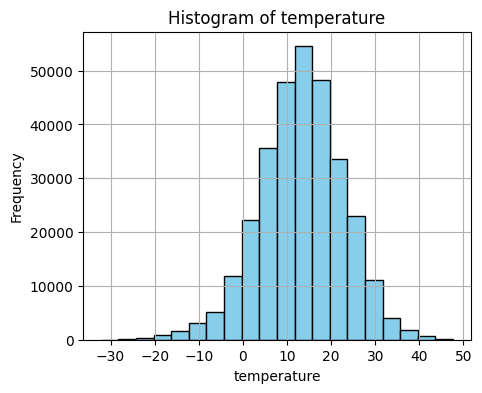

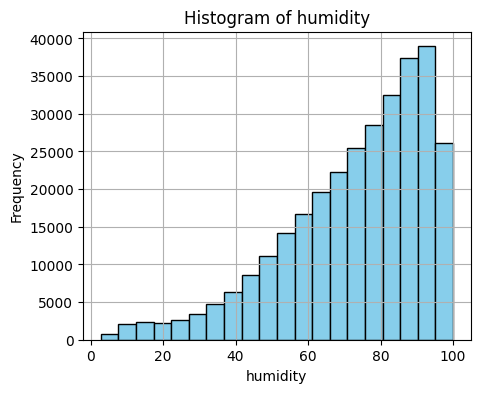

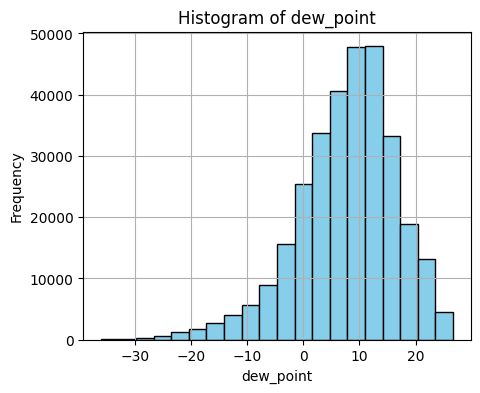

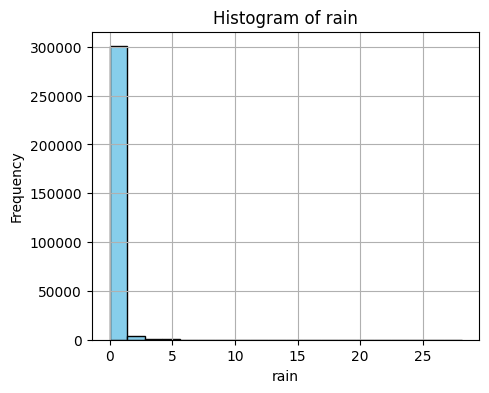

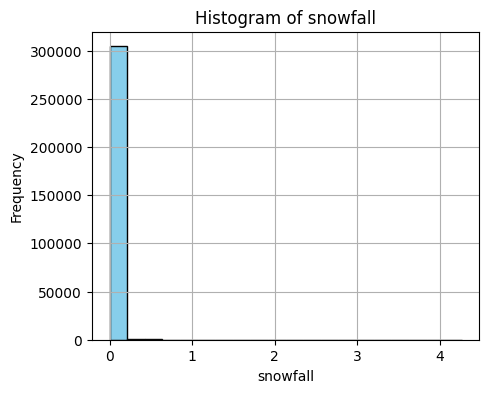

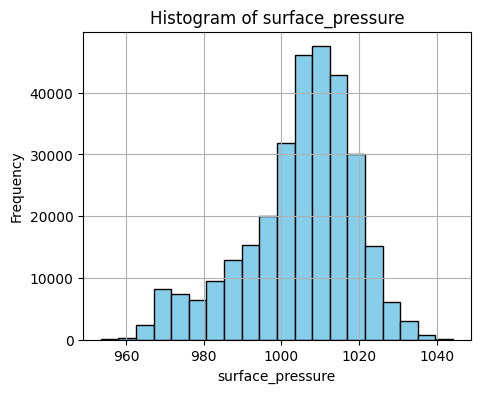

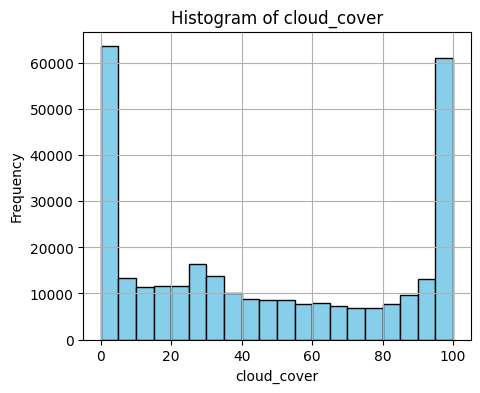

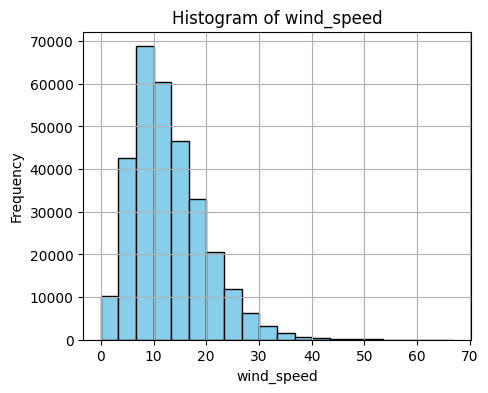

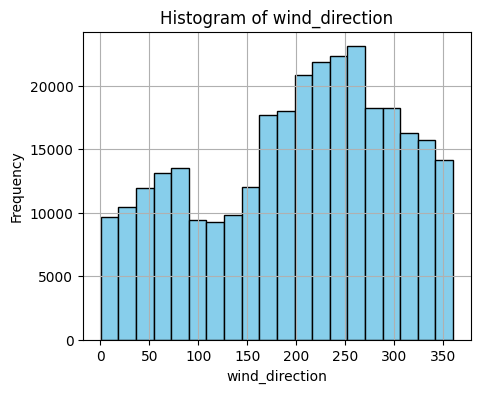

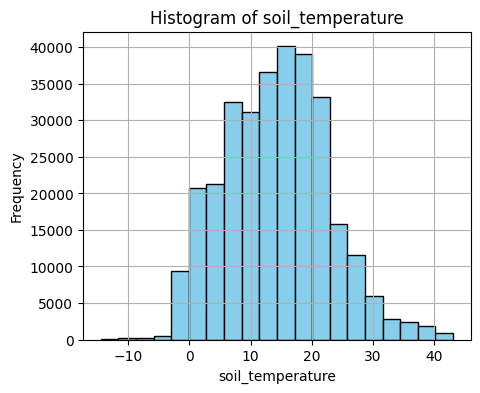

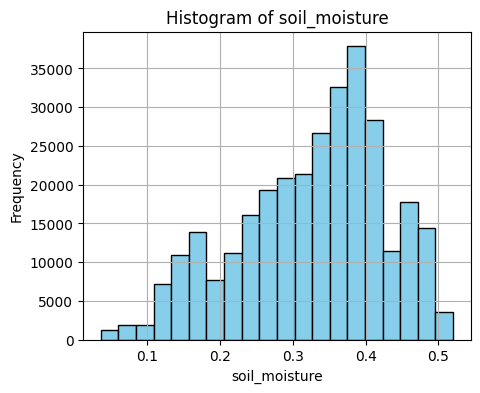

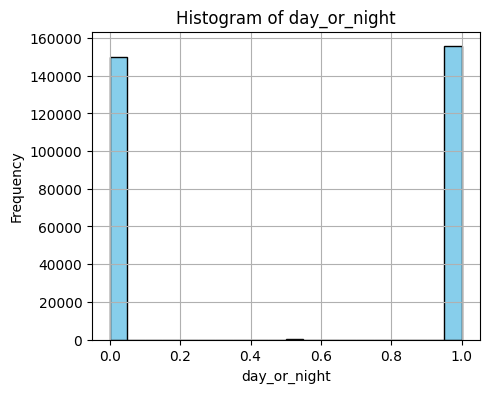

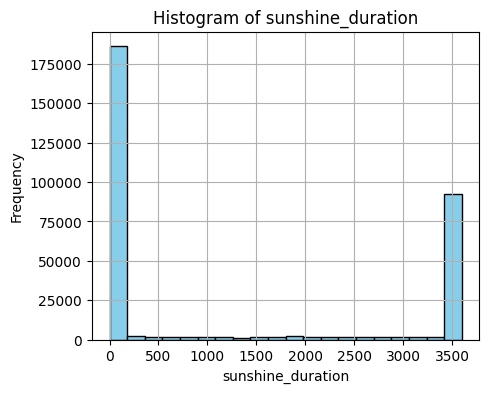

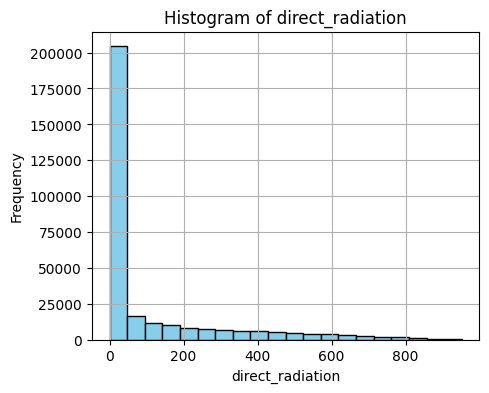

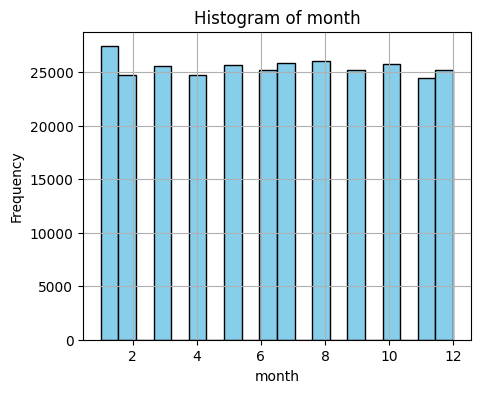

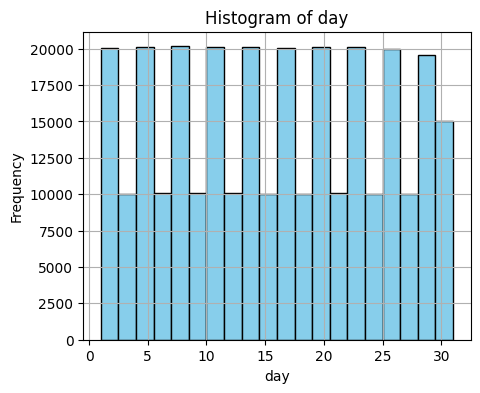

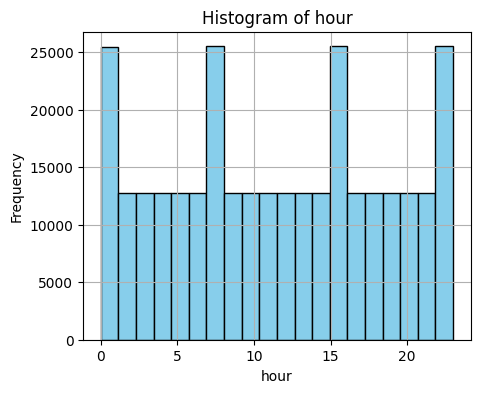

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

for column in X_train.columns:
    plt.figure(figsize=(5,4))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### Applied standard scalar to normalize the data

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# X_train_min_max_scaled = min_max_scaler.fit_transform(X_train)
X_train_standard_scaled = standard_scaler.fit_transform(X_train)

# X_test_min_max_scaled = min_max_scaler.transform(X_test)
X_test_standard_scaled = standard_scaler.transform(X_test)

In [32]:
X_train_standard_scaled.shape

(244671, 17)

In [33]:
y_train.shape

(244671,)

### Train and test various regressing models to predict average power usage under specific weather conditions

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

algorithms = {
    'Linear Regression': (LinearRegression(), {}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [50, 100, 150]}),
    'Support Vector Machine': (SVR(), {'kernel': ['linear', 'rbf'], 'C': [1, 10, 100]}),
    'XGBoost': (xgb.XGBRegressor(objective ='reg:squarederror'), {'n_estimators': [50, 100, 150], 'learning_rate': [0.05, 0.1, 0.2]}),
    'K-Nearest Neighbors': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7, 9, 15]})
}

for name, (model, params) in algorithms.items():
    grid_search = GridSearchCV(model, params, scoring='neg_mean_absolute_error', cv=5)
    grid_search.fit(X_train_standard_scaled, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_standard_scaled)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Evaluation metrics for {name}:")
    print(f"  Best parameters: {grid_search.best_params_}")
    print(f"  R2 Score: {r2:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}\n")

### It took 3 hours to run the above cell and by mistake I lost the output. Didn't ran it again due to lack to time. Though Random Forest with 150 n_estimators gave the best accuracy

### Train the final model and saved the model as pickel file

In [35]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=150, random_state=42)
rf_regressor.fit(X_train_standard_scaled, y_train)

y_pred = rf_regressor.predict(X_test_standard_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 35.59017687383835
Mean Squared Error: 4842.946289439265
R-squared: 0.7809692793735656


In [36]:
import joblib

joblib.dump(rf_regressor, 'random_forest_regressor.pkl')

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

joblib.dump(scaler, 'standard_scaler.pkl')

def predict_power_usage(new_data):
    model = joblib.load('random_forest_regressor.pkl')

    scaler = joblib.load('standard_scaler.pkl')

    new_data_scaled = scaler.transform(new_data)

    predictions = model.predict(new_data_scaled)

    return predictions

In [37]:
test = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]

print(predict_power_usage(test))

[387.39623674]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
